nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:11:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\x


Final Model Performance on Train Data:
Train Accuracy: 0.8294011401478806
Train Precision: 0.6552501126633619
Train Recall: 0.8570586501620985
Train F1 Score: 0.7426893117098711

Final Model Performance on Test Data:
Test Accuracy: 0.6456838085204452
Test Precision: 0.4084404999094367
Test Recall: 0.5160183066361556
Test F1 Score: 0.4559700738044687

Plotting Feature Importance...


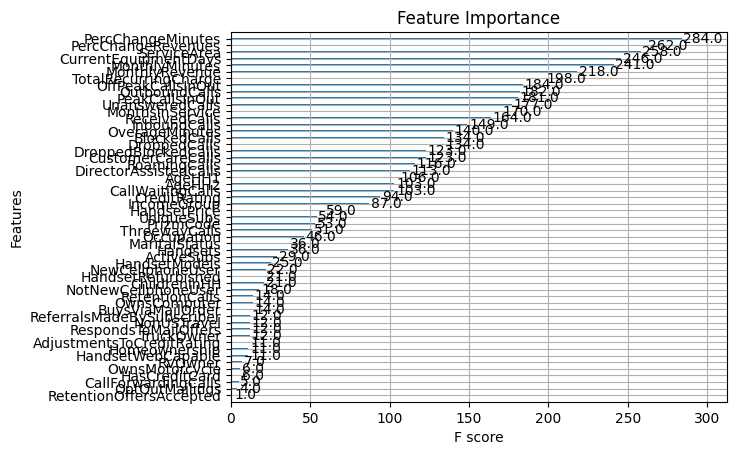

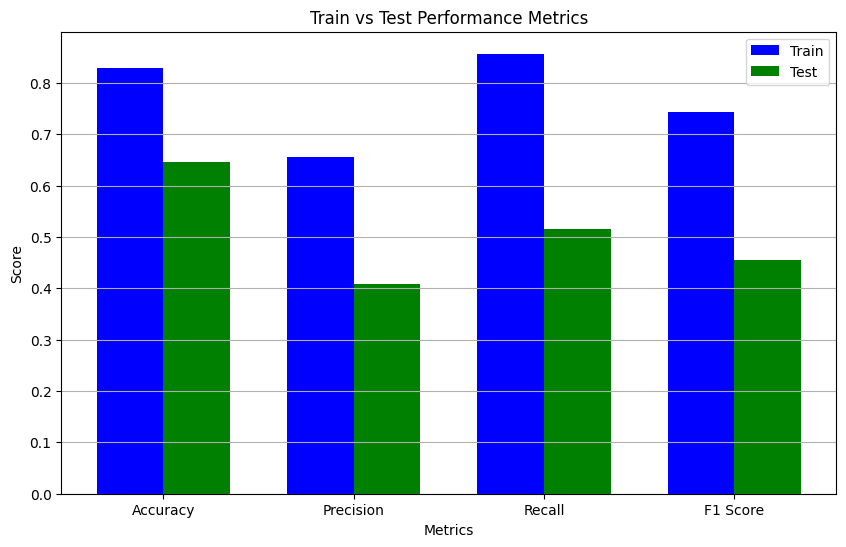

In [24]:
import pandas as pd
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda
import matplotlib.pyplot as plt

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 1. 카테고리형 변수를 처리
object_columns = preprocessed_data.select_dtypes(include=['object']).columns
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)
# 카테고리형 변수로 변환 (astype('category'))
# for col in object_columns:
#     preprocessed_data[col] = preprocessed_data[col].astype('category')

X = convert_data.drop(columns=['Churn']).astype(float)
y = convert_data['Churn'].astype(int)
# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 클래스 가중치 계산
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]  # 클래스 비율

# 데이터 스케일링
# scaler = StandardScaler()
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
# X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# XGBoost 모델 정의 (SMOTE 대신 클래스 가중치 사용)
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,  # 클래스 가중치 적용
    # enable_categorical=True,  # 카테고리형 변수 사용
    tree_method='gpu_hist',  # GPU 사용 (옵션)
    predictor='gpu_predictor'
)

# 모델 학습
xgb_model.fit(X_train, y_train)

# 훈련 데이터에서 성능 평가
y_pred_train = xgb_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# 테스트 데이터에서 성능 평가
y_pred_test = xgb_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# 성능 기록 출력
print("\nFinal Model Performance on Train Data:")
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")

print("\nFinal Model Performance on Test Data:")
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")

# 피처 중요도 시각화
print("\nPlotting Feature Importance...")
plot_importance(xgb_model, importance_type='weight')
plt.title("Feature Importance")
plt.show()

# 성능 지표 막대 그래프 그리기
def plot_metrics(accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    train_scores = [accuracy_train, precision_train, recall_train, f1_train]
    test_scores = [accuracy_test, precision_test, recall_test, f1_test]

    x = np.arange(len(metrics))  # 성능 지표의 위치
    width = 0.35  # 막대의 폭

    plt.figure(figsize=(10, 6))

    # 훈련 데이터 성능
    plt.bar(x - width/2, train_scores, width, label='Train', color='blue')

    # 테스트 데이터 성능
    plt.bar(x + width/2, test_scores, width, label='Test', color='green')

    # 그래프 설정
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Train vs Test Performance Metrics')

    # x축에 성능 지표 이름 설정
    plt.xticks(x, metrics)

    plt.legend()
    plt.grid(True, axis='y')  # y축에만 그리드 표시
    plt.show()

# 성능 그래프 그리기
plot_metrics(accuracy_train, precision_train, recall_train, f1_train,
             accuracy_test, precision_test, recall_test, f1_test)


nan-value filled
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50860, 삭제된 수 : 2
DroppedCalls : 50856, 삭제된 수 : 4
BlockedCalls : 50852, 삭제된 수 : 4
UnansweredCalls : 50842, 삭제된 수 : 10
CustomerCareCalls : 50840, 삭제된 수 : 2
ThreewayCalls : 50836, 삭제된 수 : 4
ReceivedCalls : 50830, 삭제된 수 : 6
OutboundCalls : 50827, 삭제된 수 : 3
InboundCalls : 50823, 삭제된 수 : 4
PeakCallsInOut : 50821, 삭제된 수 : 2
OffPeakCallsInOut : 50806, 삭제된 수 : 15
DroppedBlockedCalls : 50792, 삭제된 수 : 14
CallForwardingCalls : 50779, 삭제된 수 : 13
CallWaitingCalls : 50779, 삭제된 수 : 0
MonthsInService : 50778, 삭제된 수 : 1
UniqueSubs : 50777, 삭제된 수 : 1
ActiveSubs : 50777, 삭제된 수 : 0
Handsets : 50773, 삭제된 수 : 4
HandsetModels : 50773, 삭제된 수 : 0
CurrentEquipmentDays : 50768, 삭제된 수 : 5
RetentionCalls : 50634, 삭제된 수 : 134
RetentionOffersAccepted : 50634, 삭제된 수 : 0


c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:33:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'random_state': 0, 'subsample': 0.8}


c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
c:\Utils\anaconda3\envs\deep_learning\lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Se


Final Model Performance on Train Data:
Train Accuracy: 0.6482615566969577
Train Precision: 0.43014449159370466
Train Recall: 0.6877952417761746
Train F1 Score: 0.529279576999339

Final Model Performance on Test Data:
Test Accuracy: 0.6202469135802469
Test Precision: 0.3989670755326017
Test Recall: 0.6379903647625602
Test F1 Score: 0.49093075599099695


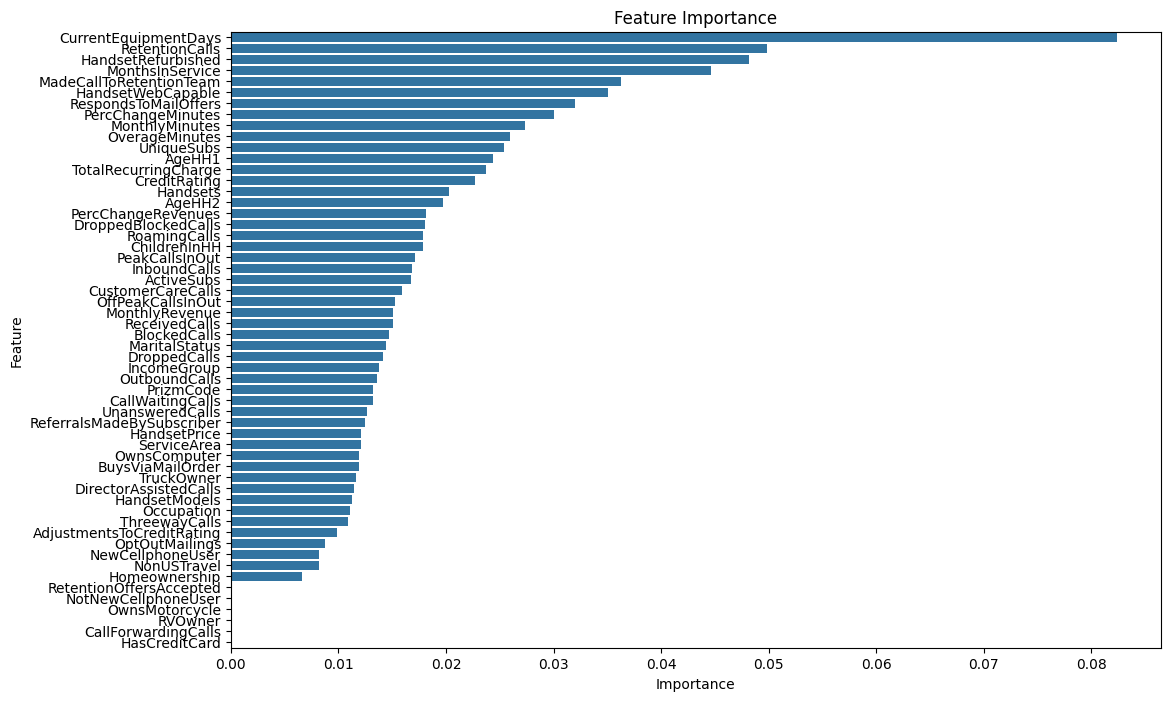

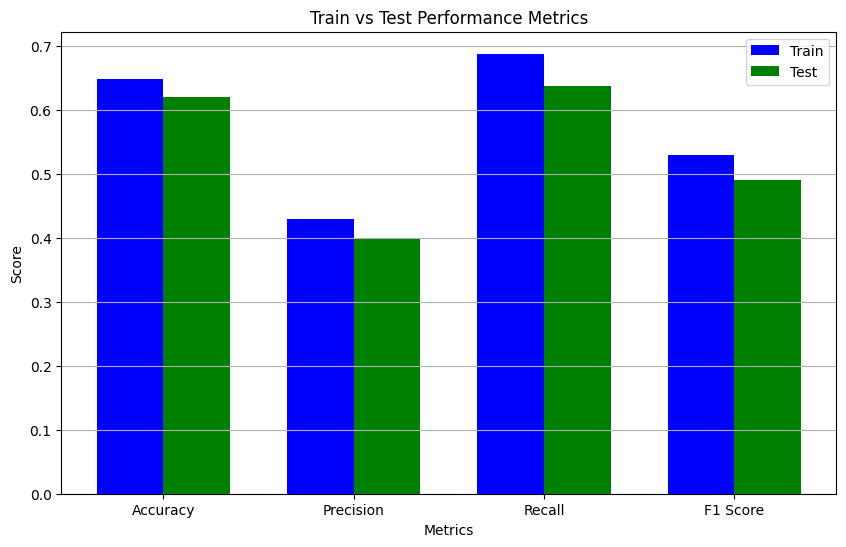

In [2]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pre_data as eda
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드 및 전처리
data = pd.read_csv('./data/train.csv', encoding='cp949')
preprocessed_data = eda.preprocessing(data)

# 카테고리형 변수를 처리
object_columns = preprocessed_data.select_dtypes(include=['object']).columns
convert_data, _ = eda.convert_category_into_integer(preprocessed_data, object_columns)

# 타겟 변수 및 독립 변수 설정
X = convert_data.drop(columns=['Churn']).astype(float)
y = convert_data['Churn'].astype(int)

# 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 클래스 가중치 계산
class_counts = y_train.value_counts()
scale_pos_weight = class_counts[0] / class_counts[1]  # 클래스 비율

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1],  # 학습률
    'n_estimators': [100, 200],  # 트리의 개수
    'subsample': [0.8, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 피처 샘플링 비율
    'random_state': [0],  # 랜덤 시드를 0으로 고정
}

# XGBoost 모델 정의
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight,  # 클래스 가중치 적용
    tree_method='gpu_hist',  # GPU 사용
    predictor='gpu_predictor'
)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='f1',  # F1 스코어를 기준으로 평가
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
    verbose=3,  # 진행 상황 출력
    n_jobs=-1  # 모든 CPU 코어 사용
)

# 하이퍼파라미터 튜닝 및 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적 모델 선택
best_model = grid_search.best_estimator_

# 훈련 데이터에서 성능 평가
y_pred_train = best_model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_train = f1_score(y_train, y_pred_train)

# 테스트 데이터에서 성능 평가
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)

# 성능 기록 출력
print("\nFinal Model Performance on Train Data:")
print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_train}")

print("\nFinal Model Performance on Test Data:")
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")

# 피처 중요도 시각화 (Seaborn)
def plot_feature_importance(model, X_train):
    feature_importances = model.feature_importances_
    feature_names = X_train.columns

    # 피처 중요도를 DataFrame으로 변환
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    })

    # 중요도 순으로 정렬
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Seaborn을 사용하여 중요도 시각화
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title('Feature Importance')
    plt.show()

# 피처 중요도 시각화 호출
plot_feature_importance(best_model, X_train)

# 성능 지표 막대 그래프 그리기
def plot_metrics(accuracy_train, precision_train, recall_train, f1_train, accuracy_test, precision_test, recall_test, f1_test):
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    train_scores = [accuracy_train, precision_train, recall_train, f1_train]
    test_scores = [accuracy_test, precision_test, recall_test, f1_test]

    x = np.arange(len(metrics))  # 성능 지표의 위치
    width = 0.35  # 막대의 폭

    plt.figure(figsize=(10, 6))

    # 훈련 데이터 성능
    plt.bar(x - width/2, train_scores, width, label='Train', color='blue')

    # 테스트 데이터 성능
    plt.bar(x + width/2, test_scores, width, label='Test', color='green')

    # 그래프 설정
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.title('Train vs Test Performance Metrics')

    # x축에 성능 지표 이름 설정
    plt.xticks(x, metrics)

    plt.legend()
    plt.grid(True, axis='y')  # y축에만 그리드 표시
    plt.show()

# 성능 그래프 그리기
plot_metrics(accuracy_train, precision_train, recall_train, f1_train,
             accuracy_test, precision_test, recall_test, f1_test)
